<a href="https://colab.research.google.com/github/pgbeermann2017/MatrizDatos/blob/master/Grafica3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

from mpl_toolkits.mplot3d import Axes3D  

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Fixing random state for reproducibility
np.random.seed(19680801)

#url="https://raw.githubusercontent.com/pgbeermann2017/MatrizDatos/master/Matriz01.csv"
# Datos ordenados en orden creciente de % inóculo
url="https://raw.githubusercontent.com/pgbeermann2017/MatrizDatos/master/MatrizInoculo.csv"
df1 = pd.read_csv(url)




xs = df1["pH"]
ys = df1["Inoculo"]
zs = np.array(df1["T"])
actividad=df1["Actividad"]


maximo=15.738000
-1
1
15.738


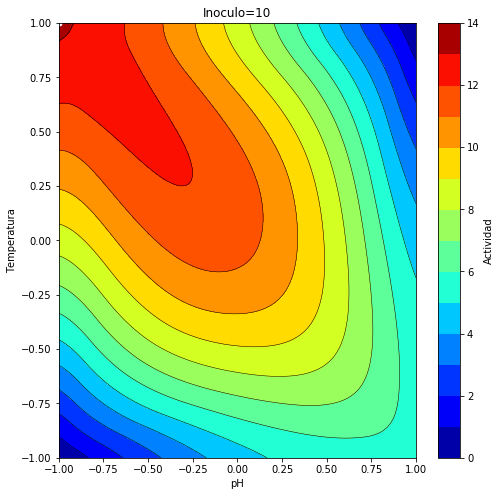

maximo=19.238000
0
0
19.238


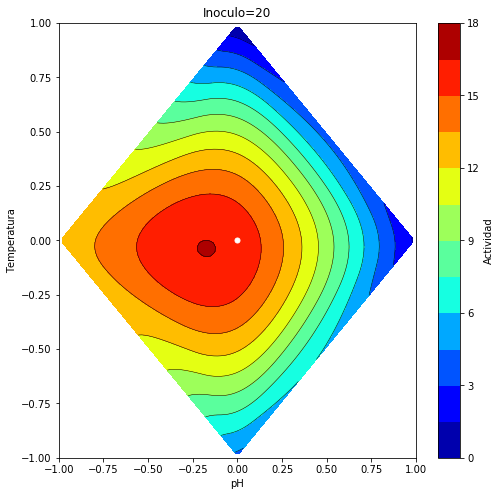

maximo=15.075000
1
-1
15.075


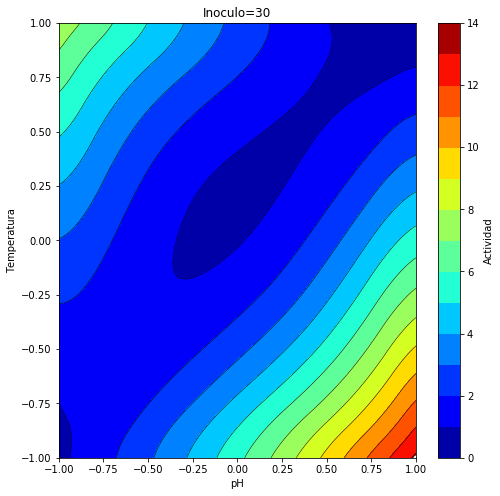

In [51]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy.ma as ma
from numpy.random import uniform, seed

seed(1234)

dict={"p1":[0,15,10],"p2":[15,33,20],"p3":[33,48,30]}
for s in dict:
  plt.figure(figsize=(8,8))
  p=s
  ini=dict[s][0]
  fin=dict[s][1]
  ino=dict[s][2]

  x = np.array(xs[ini:fin])
  y = np.array(zs[ini:fin])
  z = np.array(actividad[ini:fin])
  print("maximo=%f"%z.max())
  n=np.where(z==z.max())[0][0]
  print(x[n])
  print(y[n])
  print(z[n])
  xmax=x[n]
  ymax=y[n]
  # define grid.
  xi = np.linspace(-1,1,100)
  yi = np.linspace(-1,1,100)
  # grid the data.
  zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
 
  CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
  CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
  plt.colorbar(label="Actividad") 
  
  plt.scatter(xmax,ymax,marker='o',c='white',s=25)
  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel("pH")
  plt.ylabel("Temperatura")
  plt.title("Inoculo="+str(ino))
  plt.show()

In [58]:
n=np.where(zi==zi.max())[0][0]


0